<a href="https://colab.research.google.com/github/bee-llel/Machine-Learning/blob/master/Kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
######################

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

In [149]:
data = np.loadtxt("data_kmeans.txt")
np.random.shuffle(data)

In [150]:
##################
#Definitions#
#  X -> Represengts the Data Input 
#  K -> Represents the # of cluster
#  I -> Represents the # of element in the Input matrix X = {x1, x2, ..., xI}
#  J -> number of centroids which is equal to K
##################
# inialize and standardize the data
## Initialize each cluster centroids which are mu1 mu2 mu3 ... muK
### compute the distance between each point for each centroid
#### compute the argmin of the distance between each point and each centroid
##### assign each point to the closest centroid
###### update the centroid by computing the barycenter of the point assigned to that centroid

In [151]:
##################
#Definitions#
#  X -> Represengts the Data Input 
X_train = data[:200,:]
X_test = data[200:,:]

#  K -> Represents the # of cluster
K = 3
#  I -> Represents the # of element in the Input matrix X = {x1, x2, ..., xI}
I = 300
I_train = 200
I_test = 100
#  J -> number of centroids which is equal to K
J = K
# N -> number of features
N = 2


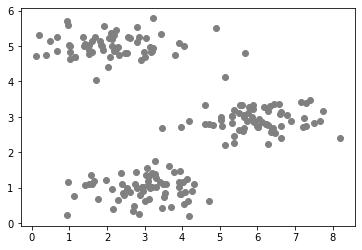

In [152]:
# inialize and standardize the data
plt.scatter(X_train[:,:1],X_train[:,1:2], c="grey")

In [153]:
print(X_train)

[[5.3353  3.0393 ]
 [3.1343  4.9618 ]
 [6.2921  2.7757 ]
 [3.2784  1.7504 ]
 [2.9518  0.89583]
 [2.5407  0.98393]
 [2.3256  4.7487 ]
 [1.5318  1.1005 ]
 [3.2311  5.7843 ]
 [5.6175  2.5975 ]
 [4.8255  2.7796 ]
 [4.0539  0.53292]
 [5.8766  3.2166 ]
 [7.2878  2.7518 ]
 [5.503   2.6292 ]
 [4.2559  0.90644]
 [2.9834  4.8405 ]
 [5.9942  2.7571 ]
 [1.7516  0.68854]
 [2.7959  0.99527]
 [4.1691  0.20581]
 [2.301   4.9724 ]
 [2.8473  0.26759]
 [5.8874  3.3462 ]
 [0.17783 5.2977 ]
 [2.6143  5.2229 ]
 [0.10512 4.7292 ]
 [5.7328  2.8774 ]
 [3.6485  1.6285 ]
 [1.5233  4.8792 ]
 [1.5178  5.0384 ]
 [6.3787  2.6502 ]
 [2.9582  1.0189 ]
 [5.7877  3.2926 ]
 [1.893   4.8904 ]
 [5.6333  2.99   ]
 [6.8858  2.8885 ]
 [0.47647 5.1354 ]
 [1.1299  0.77085]
 [3.8142  4.7353 ]
 [2.904   4.6122 ]
 [5.6403  2.6939 ]
 [3.0619  1.5719 ]
 [2.127   0.95672]
 [4.888   5.5067 ]
 [5.9128  2.8563 ]
 [2.2096  4.9147 ]
 [5.5291  3.3368 ]
 [2.372   1.4279 ]
 [6.1744  3.2903 ]
 [3.9555  0.83269]
 [2.1217  5.2085 ]
 [3.1241  0.

In [154]:
###############################################
## Initialize each cluster centroids which are mu1 mu2 mu3 ... muK:

# We will take the min and max value of our data and take random centroid between the min and max of our data coordinate:
max_x = np.max(X_train[:,0])
min_x = np.min(X_train[:,0])

max_y = np.max(X_train[:,1])
min_y = np.min(X_train[:,1])
# we compute mu :
mu_x = [ np.random.uniform(min_x,max_x) for mu in range(J) ] 
mu_y = [ np.random.uniform(min_y,max_y) for mu in range(J) ] 
mu = np.array((mu_x,mu_y)).T
print(mu)

[[5.67010228 1.76332364]
 [7.57908994 1.11716598]
 [0.63176213 2.11382713]]


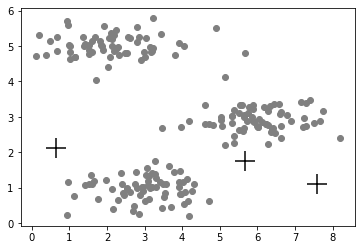

In [155]:
# visualisation:
plt.scatter(X_train[:,:1],X_train[:,1:2], c="grey")
plt.scatter(mu[:,0],mu[:,1],s=400,marker='+',c="black")

In [156]:
######################################
# compute the distance between each point and each centroid and stock it in a distance array named D using the norm 2 
# D is of dimension I * K because for each point (I point) we have K distance ( one for each centroid)

D = np.zeros((I_train,K))
for i in range(I_train):
  for j in range(J):
      D[i,j] = (X_train[i,0] - mu[j,0])**2 + (X_train[i,1] - mu[j,1])**2

print(np.max(D))

72.25551344323466


In [157]:
#### compute the argmin of the distance between each point and each centroid
yes = np.argmin(D,axis=1)
print(yes)

[0 2 0 0 2 2 2 2 2 0 0 0 0 1 0 0 2 0 2 2 0 2 2 0 2 2 2 0 0 2 2 0 2 0 2 0 0
 2 2 0 2 0 2 2 0 0 2 0 2 0 0 2 0 2 2 2 2 2 2 0 2 0 0 2 0 0 0 2 2 0 2 0 0 2
 1 0 0 2 2 2 0 0 2 0 1 2 0 0 2 2 0 0 0 2 2 2 1 0 2 2 2 0 2 2 2 0 0 0 2 0 0
 2 0 2 2 2 0 0 1 0 0 0 2 0 0 0 0 2 2 2 0 0 0 0 2 0 0 0 0 2 0 2 0 0 0 2 0 2
 2 2 1 0 2 2 0 2 0 2 2 0 0 0 0 2 2 1 2 1 0 0 0 2 2 2 2 1 0 2 2 2 2 0 0 2 0
 0 2 0 0 0 2 2 0 0 2 0 2 2 0 2]


In [158]:
###### update the centroid by computing the barycenter of the point assigned to that centroid
for i in range(1,I_train):
  for k in range(1,K+1):
    for n in range(N):
      if yes[i-1] == k:
        mu[k-1,n] = X_train[i-1][n]/k

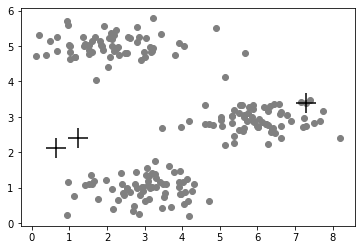

In [159]:
plt.scatter(X_train[:,:1],X_train[:,1:2], c="grey")
plt.scatter(mu[:,0],mu[:,1],s=400,marker='+',c="black")